# Analysis of Pre-Trained Sentiment Models

Storing in separate notebook to avoid re-running all models. 

Setting up our env variables

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [332]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Loading Data from `sentiment.ipynb`

In [333]:
data = pd.read_csv('./data_with_sentiment.csv')

Understanding the data

In [334]:
data.head()

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,...,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,emotion_output,hate_probs,hate_output
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...,0.3818,positive,"{'NEG': 0.6141573190689087, 'NEU': 0.378498435...",NEG,"{'others': 0.1764051467180252, 'joy': 0.002714...",disgust,"{'hateful': 0.005217170342803001, 'targeted': ...",[]
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...,0.7351,positive,"{'NEG': 0.01712794601917267, 'NEU': 0.41241669...",POS,"{'others': 0.9740970134735107, 'joy': 0.014058...",others,"{'hateful': 0.008792026899755001, 'targeted': ...",[]
2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,897218253826555905,JTaylorSkinner,Jenn Taylor-Skinner (she/her),...,joe rogan send little brother shane interrupt ...,joe rogan send little brother shane interrupt ...,-0.2500,negative,"{'NEG': 0.3434396982192993, 'NEU': 0.649206459...",NEU,"{'others': 0.0670844316482544, 'joy': 0.001664...",disgust,"{'hateful': 0.006042167544364929, 'targeted': ...",[]
3,2022-10-18 00:00:08,Viral handbag designer and EBONY Power100 Styl...,"['StaceyAbrams', 'BrandonBlackwood', 'EBONYMag']",[],[],1,8,39008044,EBONYMag,EBONY MAGAZINE,...,viral handbag designer ebony power style curat...,viral handbag designer ebony power style curat...,0.7184,positive,"{'NEG': 0.001946183037944138, 'NEU': 0.9608251...",NEU,"{'others': 0.9458006024360657, 'joy': 0.044131...",others,"{'hateful': 0.005180110689252615, 'targeted': ...",[]
4,2022-10-18 00:00:11,THE MOST DANGEROUS THING FACING GEORGIA IS 4 M...,[],[],[],212,528,1169707149167140867,MentallyDivine,Brian Baez,...,dangerous thing facing georgia years brian kem...,dangerous thing facing years wow,0.1045,positive,"{'NEG': 0.9752785563468933, 'NEU': 0.021463904...",NEG,"{'others': 0.9482651948928833, 'joy': 0.011214...",others,"{'hateful': 0.013145583681762218, 'targeted': ...",[]


In [335]:
data['sentiment_probs'].iloc[0]

"{'NEG': 0.6141573190689087, 'NEU': 0.3784984350204468, 'POS': 0.0073442705906927586}"

### Getting Average VADER Sentiment Scores

In [336]:
### Get the counts of all tweets of each specific category (Abrams, Kemp, Election)

# Explode topics into a single row for each
data['topic'] = data['topic'].apply(lambda x: x.replace(',', ''))
data['topic'] = data['topic'].apply(lambda x: x.split())
topic_counts = data.explode('topic')

# Group by search term topic (kemp, abrams, or election)
topic_counts = topic_counts.groupby(['topic'])['sentiment_score'].mean().reset_index()
# topic_counts.reset_index(inplace=True)

# View results
topic_counts

,topic,sentiment_score
0,abrams,-0.024808
1,election,0.018225
2,kemp,0.007445


(-0.03, 0.03)

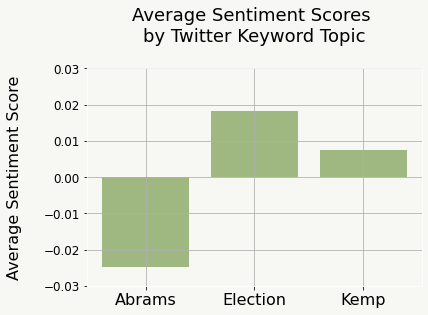

In [337]:
fig, ax = plt.subplots()

plt.bar(topic_counts['topic'].str.capitalize(), topic_counts['sentiment_score'], color = color1)

# for i in range(len(topic_counts['topic'])):
#     plt.text(i, topic_counts['sentiment_score'][i], np.round(topic_counts['sentiment_score'][i], 3), ha = 'center', size = 12)

plt.xticks(size = 16)
plt.title('Average Sentiment Scores \nby Twitter Keyword Topic\n', size = 18)
plt.ylabel('Average Sentiment Score\n', size = 16)
plt.ylim(-0.03, 0.03)

### Getting Proportions of Tweets in each sentiment bin

In [338]:
topic_counts = data.explode('topic')
topic_counts_bin = topic_counts.groupby(['topic', 'sentiment_bin']).count().reset_index().rename(columns = {'created_at':'counts'})
topic_counts_bin = topic_counts_bin[['topic', 'sentiment_bin', 'counts']]

In [339]:
topic_counts_bin

,topic,sentiment_bin,counts
0,abrams,negative,13084
1,abrams,neutral,10224
2,abrams,positive,12575
3,election,negative,2048
4,election,neutral,2016
5,election,positive,2227
6,kemp,negative,5134
7,kemp,neutral,3815
8,kemp,positive,5786


In [340]:
total_tweets = topic_counts_bin.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

topic_counts_bin = topic_counts_bin.merge(total_tweets, on = 'topic', how = 'inner')
topic_counts_bin['prop'] = topic_counts_bin['counts'] / topic_counts_bin['total_tweets']

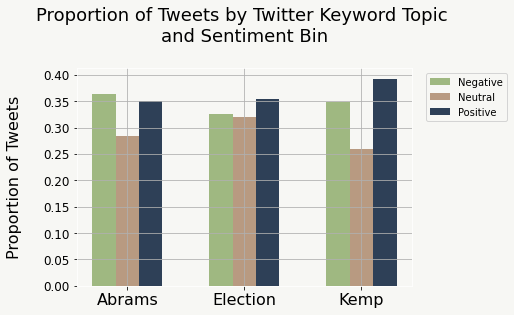

In [341]:
fig, ax = plt.subplots()

x = np.arange(len(topic_counts_bin['topic'].unique()))

neg = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'negative']['prop'])
neu = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'neutral']['prop'])
pos = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'positive']['prop'])
width = 0.2

plt.bar(x - 0.2, neg, width = width, color = color1)
plt.bar(x, neu, width = width, color = color2)
plt.bar(x + 0.2, pos, width = width, color = color3)

# # for i in range(len(topic_counts['topic'])):
# #     plt.text(i, topic_counts['sentiment_score'][i], np.round(topic_counts['sentiment_score'][i], 3), ha = 'center', size = 12)

plt.xticks(x, ['Abrams', 'Election', 'Kemp'],size = 16)
plt.title('Proportion of Tweets by Twitter Keyword Topic \nand Sentiment Bin\n', size = 18)
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.legend(['Negative', 'Neutral', 'Positive'], loc = 'upper right', bbox_to_anchor = (1.3,1))

In [342]:
print(data['hate_probs'].iloc[0])

{'hateful': 0.005217170342803001, 'targeted': 0.0038347800727933645, 'aggressive': 0.003884871257469058}


In [343]:
topic_counts = data.explode('topic')
topic_counts.columns

Index(['created_at', 'text', 'hashtags', 'user_mention_ids',
       'user_mention_screen_names', 'retweet_count', 'favorite_count',
       'user_id', 'user_screen_name', 'user_name', 'user_location',
       'user_friends_count', 'user_followers_count', 'user_favourites_count',
       'user_verfied', 'user_statuses_count', 'topic', 'text_clean',
       'text_clean_noStop', 'text_clean_noStop_noSearch', 'sentiment_score',
       'sentiment_bin', 'sentiment_probs', 'sentiment_output', 'emotion_probs',
       'emotion_output', 'hate_probs', 'hate_output'],
      dtype='object')

In [344]:
topic_counts_emotion = topic_counts.groupby(['topic', 'emotion_output']).count().reset_index().rename(columns = {'created_at': 'counts'})

In [345]:
topic_counts_emotion_sub = topic_counts_emotion[(topic_counts_emotion['emotion_output'] != 'others') & ((topic_counts_emotion['topic'] == 'abrams') | (topic_counts_emotion['topic'] == 'kemp'))]

In [346]:
total_tweets = topic_counts_emotion_sub.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

topic_counts_emotion_sub = topic_counts_emotion_sub.merge(total_tweets, on = 'topic', how = 'inner')

topic_counts_emotion_sub['prop'] = topic_counts_emotion_sub['counts'] / topic_counts_emotion_sub['total_tweets']

In [347]:
topic_counts_emotion_sub = topic_counts_emotion_sub[['topic', 'emotion_output', 'prop']]
topic_counts_emotion_sub = topic_counts_emotion_sub.sort_values(['topic', 'prop'])

In [348]:
topic_counts_emotion_sub

,topic,emotion_output,prop
4,abrams,sadness,0.005884
5,abrams,surprise,0.012526
2,abrams,fear,0.021207
3,abrams,joy,0.060883
0,abrams,anger,0.096190
1,abrams,disgust,0.803309
10,kemp,sadness,0.005090
11,kemp,surprise,0.007919
8,kemp,fear,0.011312
9,kemp,joy,0.046380


In [349]:
import seaborn as sns

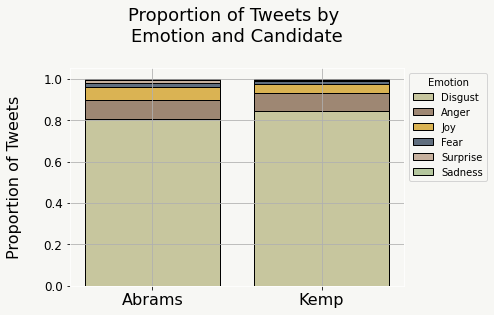

In [350]:
sns.histplot(
    topic_counts_emotion_sub,
    x = 'topic',
    weights = 'prop',
    hue = 'emotion_output',
    multiple = 'stack',
    palette = [color1, color2, color3, color7, color5, color6],
    shrink = 0.8
)

plt.title('Proportion of Tweets by \nEmotion and Candidate\n', fontsize = 18)
plt.ylabel('Proportion of Tweets\n', fontsize = 16)
plt.xlabel('')
plt.xticks([0,1], ['Abrams', 'Kemp'], fontsize = 16)

# plt.legend(title = 'Emotion',loc = 2, bbox_to_anchor = (1,1))

plt.legend(title = 'Emotion', labels = ['Disgust', 'Anger', 'Joy', 'Fear', 'Surprise', 'Sadness'], loc = 2, bbox_to_anchor = (1,1))


In [351]:
topic_counts_emotion_sub_no_dis = topic_counts_emotion[(topic_counts_emotion['emotion_output'] != 'others') & (topic_counts_emotion['emotion_output'] != 'disgust') & ((topic_counts_emotion['topic'] == 'abrams') | (topic_counts_emotion['topic'] == 'kemp'))]
topic_counts_emotion_sub_no_dis

,topic,emotion_output,counts,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,...,text_clean,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,hate_probs,hate_output
0,abrams,anger,1651,1651,1651,1651,1651,1651,1651,1651,...,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651
2,abrams,fear,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
3,abrams,joy,1045,1045,1045,1045,1045,1045,1045,1045,...,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
5,abrams,sadness,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
6,abrams,surprise,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
14,kemp,anger,607,607,607,607,607,607,607,607,...,607,607,607,607,607,607,607,607,607,607
16,kemp,fear,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
17,kemp,joy,328,328,328,328,328,328,328,328,...,328,328,328,328,328,328,328,328,328,328
19,kemp,sadness,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
20,kemp,surprise,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56


In [352]:
total_tweets = topic_counts_emotion_sub_no_dis.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis.merge(total_tweets, on = 'topic', how = 'inner')

topic_counts_emotion_sub_no_dis['prop'] = topic_counts_emotion_sub_no_dis['counts'] / topic_counts_emotion_sub_no_dis['total_tweets']

In [353]:
topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis[['topic', 'emotion_output', 'prop']]
topic_counts_emotion_sub_no_dis

,topic,emotion_output,prop
0,abrams,anger,0.489040
1,abrams,fear,0.107820
2,abrams,joy,0.309538
3,abrams,sadness,0.029917
4,abrams,surprise,0.063685
5,kemp,anger,0.548329
6,kemp,fear,0.072267
7,kemp,joy,0.296296
8,kemp,sadness,0.032520
9,kemp,surprise,0.050587


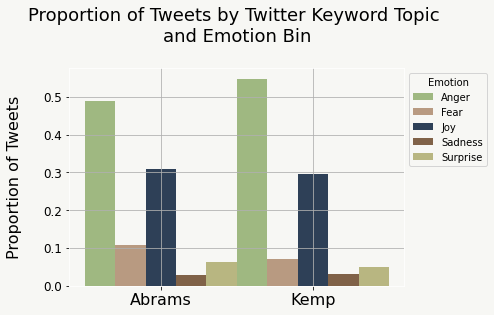

In [360]:
fig, ax = plt.subplots()

x = np.arange(len(topic_counts_emotion_sub_no_dis['topic'].unique()))

anger = list(topic_counts_emotion_sub_no_dis[topic_counts_emotion_sub_no_dis['emotion_output'] == 'anger']['prop'])
fear = list(topic_counts_emotion_sub_no_dis[topic_counts_emotion_sub_no_dis['emotion_output'] == 'fear']['prop'])
joy = list(topic_counts_emotion_sub_no_dis[topic_counts_emotion_sub_no_dis['emotion_output'] == 'joy']['prop'])
sadness = list(topic_counts_emotion_sub_no_dis[topic_counts_emotion_sub_no_dis['emotion_output'] == 'sadness']['prop'])
surprise = list(topic_counts_emotion_sub_no_dis[topic_counts_emotion_sub_no_dis['emotion_output'] == 'surprise']['prop'])
width = 0.2

plt.bar(x - 0.4, anger, width = width, color = color1, label = 'Anger')
plt.bar(x - 0.2, fear, width = width, color = color2,  label = 'Fear')
plt.bar(x, joy, width = width, color = color3,  label = 'Joy')
plt.bar(x + 0.2, sadness, width = width, color = color5,  label = 'Sadness')
plt.bar(x + 0.4, surprise, width = width, color = color6,  label = 'Surprise')

# # for i in range(len(topic_counts['topic'])):
# #     plt.text(i, topic_counts['sentiment_score'][i], np.round(topic_counts['sentiment_score'][i], 3), ha = 'center', size = 12)

plt.xticks(x, ['Abrams', 'Kemp'],size = 16)
plt.title('Proportion of Tweets by Twitter Keyword Topic \nand Emotion Bin\n', size = 18)
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.legend()

plt.legend(title = 'Emotion', labels = ['Anger', 'Fear', 'Joy', 'Sadness', 'Surprise'], loc = 2, bbox_to_anchor = (1,1))
# plt.legend(['Negative', 'Neutral', 'Positive'], loc = 'upper right', bbox_to_anchor = (1.3,1))